# Въведение в Machine Learning

Целите днес:

* Да си подкараме jupyter, scikit-learn и всичко останало
* Вид на входните данни
* Видове machine learning: (supervised и unsupervised)
* Няколко алгоритъма отгоре-отгоре

# Нужните технологии

Трябват ви jupyter, scikit-learn и няколко други технологии. Имате два начина да ги подкарате:

* `pip install`
* Anaconda (https://anaconda.org/)

Ние предпочитаме първия подход, понеже сме относително уверени в Python и ни е по-прозрачно така.
Бихме ви предложили да направите същото. Разбира се, може да пробвате и Anaconda.
Няма голямо значение кое от двете ще изберете, стига да ви е комфортно.

# `pip install`

За да начало са ви нужни следните неща:

```
pip install numpy scipy matplotlib ipython scikit-learn pandas pillow mglearn jupyter
```

Конкретно:

* numpy, scipy – библиотеки за "работа с числа"
* matplotlib, pillow – чертане на графики
* scikit-learn – machine learning, тук се случва магията
* ipython – по-шантава интерактивна конзола
* jupyter – система за notebooks за Python (и други)
* pandas – библиотека за анализ на данни
* mglearn – библиотеката на [Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do), има полезни функции за чертане

Веднъж като сте качили всичко това, просто изпълнете в терминала:

```
jupyter notebook
```

Това ще ви отвори браузър, където може да започнете работа.

# Anaconda

Идете на сайта и си го изтеглете. Нататък сте вие самите.

https://anaconda.org/

# Jupyter

За начало, нека разгледаме Jupyter.

* Интерактивна среда в notebook формат
* Позволява ви да изпълнявате код и да чертаете диаграми на едно място
* Експериментално ще го ползваме за слайдове и материали (като тази лекция, например)

Demo!

Jupyter е интерактивна среда, която ви позволява да изпълявате код и да чертаете диаграми в notebook формат. Тя е много подходяща за експериментиране с модели. Допълнително, може да споделите изследванията с някой като му пратите готов notebook. Например, тази лекция е един голям jupyter notebook, който ползваме едновремено за примери и слайдове. Части от нея (като този параграф) няма да бъдат достъпни в слайдовете, но ще може да разгледате впоследствие.

# Python

Python е относително прост език за програмиране. Ще ви го разкажем в по-късна лекция – засега примерите ще бъдат частично разбираеми, частично черна магия. Не се притеснявайте ако нещо не ви е ясно. Избрали сме го, защото той има най-добрите библиотеки за machine learning. Авторите на тези библиотеки пък са го избрали, защото е много лесен за научаване.

Стефан го мрази със страст. Може да го разпитате в някое междучасие. Нека това да не ви обезсърчава – обективно погледнато е добър език, особено за този тип проблеми.

Долното парче код ще ви е нужно в повечето jupyter notebooks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

%matplotlib notebook

# Machine Learning

Проблемите, подходящи за "машинно самообучение", имат следните качества:

* Големи масиви от данни
* "Нагаждаме" различни алгоритми към проблема, докато постигнем резултат
* Тренираме модел, който ни позволява да отговорим на въпроси за нови данни
* Rule of thumb: ако човек може да реши проблема за около 2 секунди, вероятно може да направим ML решение

Някои интересности:

* Повече данни могат да ни помогнат да постигнем по-добър резлутат (до един момент)
* При коренно различни данни може да се наложи да ползваме друг алгоритъм
* Всичко е проба и грешка – трябва да пробваме различни алгоритми и да разбираме какво се случва
* Има много пинизи и дребни детайли

# Математика

Каква математика ще ви е нужна? Кратката версия:

$$ y = ax + b $$

(където $y$ и $b$ са вектори, а $a$ и $x$ са матрици)

Дългата версия е по-сложна.

Малко по-детайлно:

Задължително ще ви трябва да разбирате от поне малко линейна алгебра. Като начало, трябва да разбирате от умножение на матрици и да ви е относително комфортно да го правите. Това е едно добро начало.

В подробности – всеки алгоритъм си има особеностите и математиката, свързана с него. Линейната регресия е напълно разбираема с познания от първи семестър, първи курс. Други алгоритмни като Support Vector Machines или Principal Component Analysis са по-сложни и искат повече познания. На практика, може да стигнете доста далеч с повърхностно разбиране на тези алгоритми. На теория, колкото повече математика знаете, толкова по-добре ще се оправите.

За целите на курса ще се нуждаем единствено от уравнението по-горе.

# Входни данни

Обикновено работим с таблица от входни данни:

* Всеки ред е определена инстанция (например различен човек)
* Всяка колона е характерискита на този човек (възраст, брой деца, т.н.)
* Характеристиките още се наричат (на чист български) feature-и
* Опционално към всеки ред може да има отговор на въпроса, за който правим модел (още се нарича label)
* Засега нека приемем, че клетки съдържат числа (текста може да се сведе до много feature-и)
* Обикновено разглеждаме данните като матрица $X$, а етикетите (label-ите) като вектор $y$

| Възраст | Коли | Къща | Деца | Женен?   | Куче? | Купува лодка? |
|---------|------|------|------|----------|-------|:-------------:|
| 66      | 1    | да   | 2    | вдовец   | не    | **да**        |
| 52      | 2    | не   | 3    | женен    | не    | **да**        |
| 22      | 0    | не   | 0    | женен    | да    | **не**        |
| 25      | 1    | не   | 1    | неженен  | не    | **не**        |
| 44      | 0    | не   | 2    | разведен | не    | **не**        |
| 39      | 1    | да   | 2    | женен    | да    | **не**        |
| 26      | 1    | не   | 2    | неженен  | не    | **не**        |
| 40      | 3    | да   | 1    | женен    | да    | **не**        |
| 53      | 2    | да   | 2    | разведен | не    | **да**        |
| 64      | 2    | да   | 3    | разведен | не    | **да**        |
| 58      | 2    | да   | 2    | женен    | да    | **да**        |
| 33      | 1    | не   | 1    | неженен  | не    | **не**        |


На първите 6 колони от предната таблица може да гледате като матрицата $X$, докато на последната колона като вектора $y$.

Булевите данни могат да се кодират като числата 0 и 1, а енумерациите (женен?) като серия от числа. Различни репрезентации може да са подходящи за различни алгоритми.

Конвенцията $X$ и $y$ ще се ползва постоянно, така че е добре да свикнете с нея. Когато се опитваме да отговаряме на въпроси (тези хора биха ли си купили лодка?), ще подаваме хората като матрица $X$ и ще очакваме да получим вектор $y$, където всеки елемент от вектора ще съдържа отговор дали този човек би си купил лодка.

Работата с текст обикновено се свежда до извличане на скаларни feature-и от данните (например колоните могат да съответстват на уникални думи в документа, докато клетките – на брой срещания). Това е по-дълбока вода, която ще покрием по-натам.

# Примерни набори от данни

scikit-learn предлага няколко набора от примерни данни с които може да работите.

* boston
* iris
* diabetes
* digits
* linnerud
* wine
* breast_cancer

Всички те могат да се ползват за прости експерименти и илюстрация на моделите. Дори ще ползваме някои.

Ако искате да ползвате определен dataset:

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


# boston demo

Ето описание на boston dataset-а:

In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Данните са в `boston.data`, имената на feature-ите са в `boston.feature_names` (съответстват не тези кратки съкращения по-горе), а очакваната цел е в `boston.target`.

In [7]:
boston.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [10]:
boston.target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

Обърнете внимание, че това не са Python масиви, ами NumPy вектори и матрици.

# Синтетични набори от данни

scikit-learn предлага и някои синтетични набори от данни. Понякога и те са интересни.

Любопитен пример е `make_moons`, който прави два полумесеца.

<IPython.core.display.Javascript object>


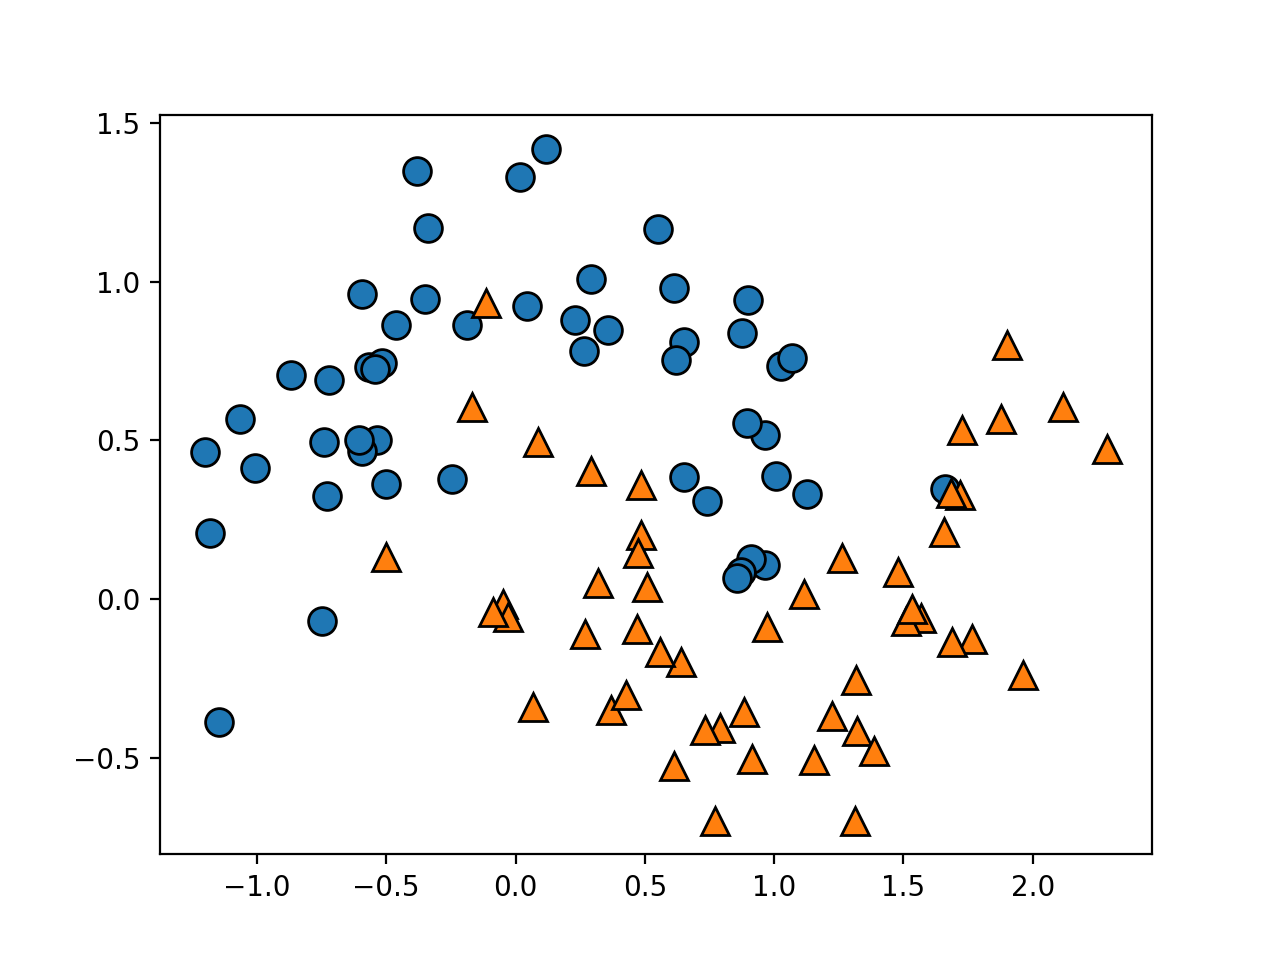

In [11]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

plt.close()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

None

Този dataset е по-лесно разбираем.

In [12]:
X

array([[ 1.87756309,  0.56839425],
       [ 0.36877983, -0.34894509],
       [ 0.96515318,  0.10921819],
       [ 0.48599685,  0.20291313],
       [ 1.72532644,  0.53367598],
       [ 1.47976586,  0.08726406],
       [ 2.11889248,  0.60498388],
       [-0.74017805,  0.49615542],
       [-0.38099245,  1.34740194],
       [ 0.22944941,  0.87981305],
       [ 1.31311917, -0.69665985],
       [ 0.87435391,  0.83750547],
       [ 0.77145295, -0.69709227],
       [ 1.26285558,  0.12916271],
       [-0.71988634,  0.69106791],
       [ 0.79205253, -0.40516241],
       [ 1.31886119, -0.41396289],
       [ 0.26579093,  0.78151982],
       [ 0.08686038,  0.49400243],
       [-0.74872343, -0.06972957],
       [ 0.88404174, -0.35425773],
       [ 1.02671711,  0.73292915],
       [ 0.73867317,  0.30808589],
       [ 1.12856036,  0.33191968],
       [ 1.15536561, -0.50593577],
       [ 1.56825139, -0.05911358],
       [ 0.29004812,  1.00820293],
       [ 0.64076308, -0.19860992],
       [-1.20034998,

In [13]:
y

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0])

Впрочем, ето невронна мрежа, която разпознава граница между двата класа:

<IPython.core.display.Javascript object>


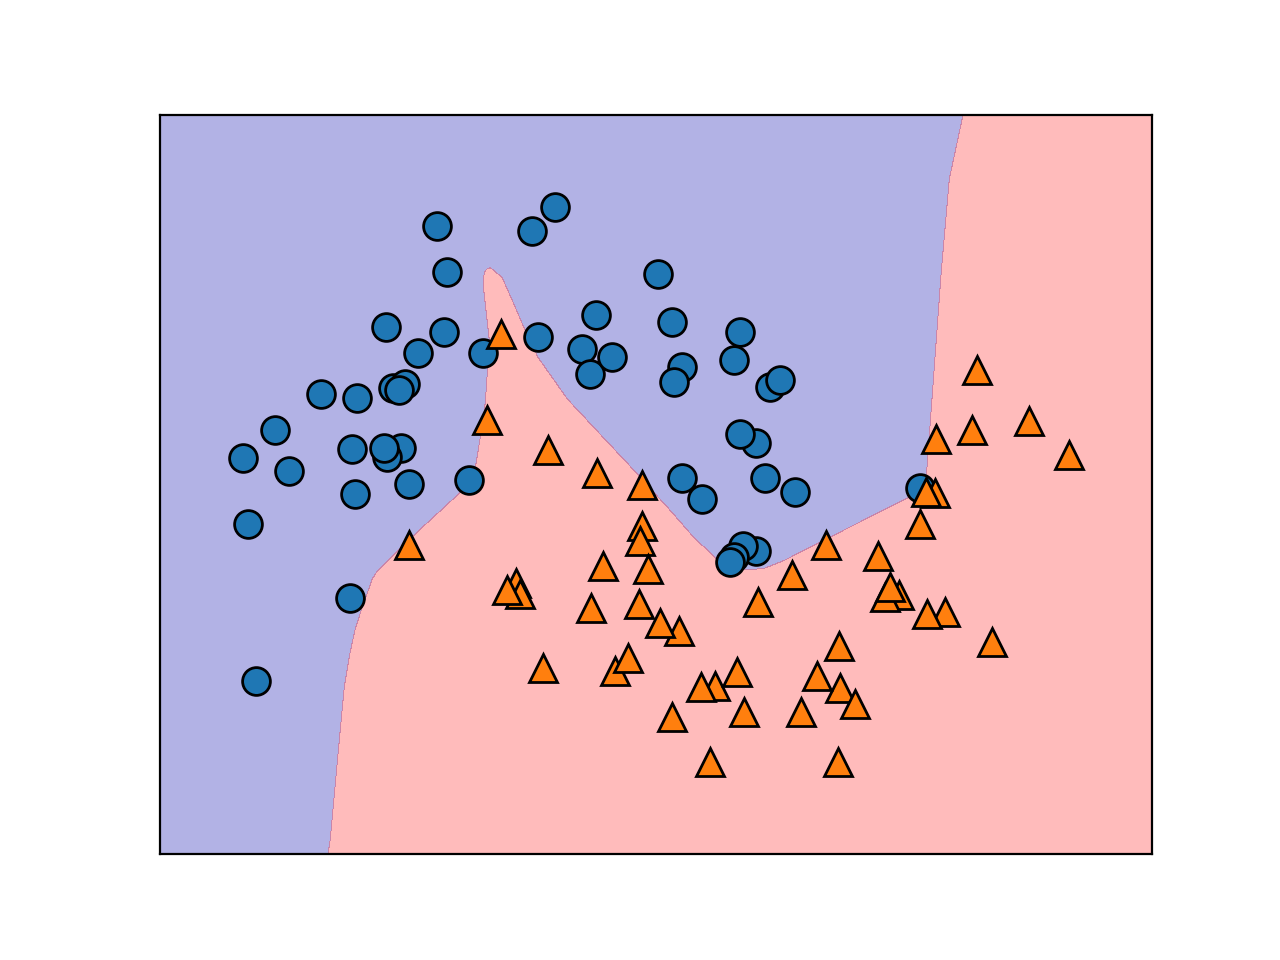

In [14]:
from sklearn.neural_network import MLPClassifier
plt.close()

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X, y)
mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

Горния код има няколко проблема, в които ще влезем по-натам. Засега просто искаме да ви покажем малко графики, не да разберем как работят невронните мрежи (което е дълъг и сложен въпрос).

# Повече за sklearn.datasets

Повече информация за наборите от данни в scikit-learn може да намерите в документацията:

http://scikit-learn.org/stable/datasets/index.html

# Supervised vs. unsupervised learning

Алгоритмите могат да се разделят на два видя:

* Supervised learning – такива, които разполагат с labelled данни и генерализират (да отговарят на въпроси за нови данни)
* Unsupervised learning – такива, които нямат label-и и трябва да открият статистически зависимости в данните

# Supervised learning

Примери за supervised learning са:

* При набор от данни с цени и параметри на апартаменти да определим колко би струвал друг апартамент с определени апартаменти.
* При набор от данни за тумори да определим дали един е доброкачествен или злокачествен

# Unsupervised learning

Тези алгоритми са по-разнородни и приложими в определени сфери. Например:

* При набор от потребители и техните филмови рейтинги да създадем групи от видове предпочитания
* При набор от многомерни данни данни да сведем броя измерения до по-малък такъв запазвайки повечето информация

# Регресия vs. Класификация

Бихме могли да разделим supervised learning на два вида:

* Регресия – опитваме се да сведем данните до непрекъсната стойност (цена на апартамент)
* Класификация – опитваме се да определим данните дали попадат в една от две категории (доброкачествен или злокачествен тумор)

Стандартен подход за класификация с 3+ класа е one-vs-many – създаваме по един класификатор за всяка категория, прекарваме данните през тях и избираме най-вероятната.

# Няколко алгоритъма

Сега ще разгледаме няколко алгоритъма отгоре-отгоре. Целта е да разберем как работят концептуално. Ще разгледаме всеки от тях в детайли в следващи лекции.

# Disclaimer

Ще гледаме набори от данни с едно или две измерения. Те са доста лесни за визуализация, но рядко реалистични – обикновено работим със десетки, стотици или дори хиляди feature-а (т.е. измерения). Това е далеч по-трудно за визуализация, откъдето идва и голяма част от предизвикателството.

# k-Nearest Neighbours (kNN)

### Supervised, класификация

Възможно най-простия алгоритъм.

Запазва целия dataset. За да класифицира нов елемнт намира най-близкия (линейно, в евклидово пространство) до него и отговаря със същия клас:

<IPython.core.display.Javascript object>


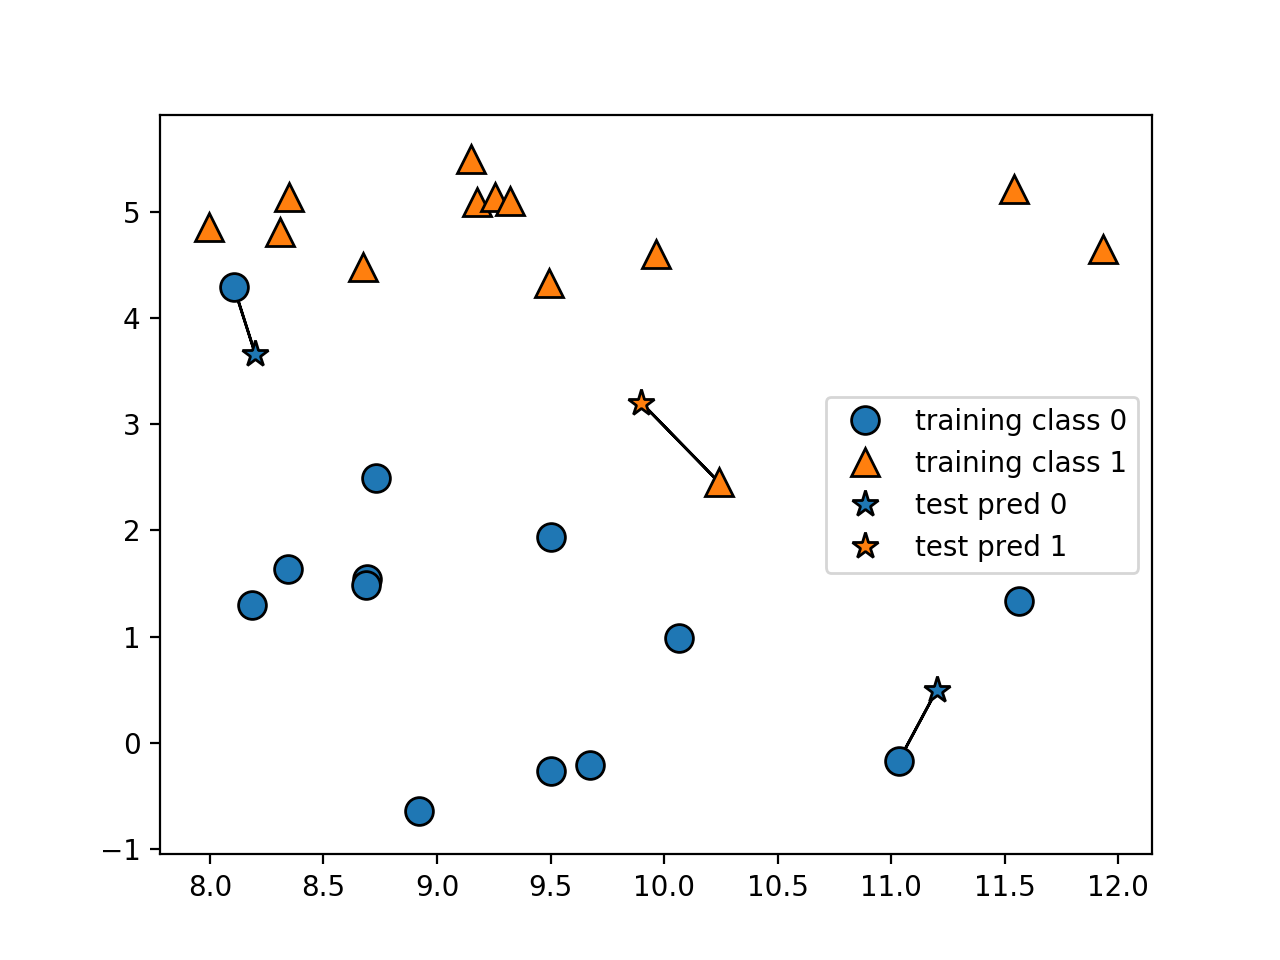

In [27]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Предния пример гледаше 1 най-близък съсед. Може да се имплементира да гледа няколко:

<IPython.core.display.Javascript object>


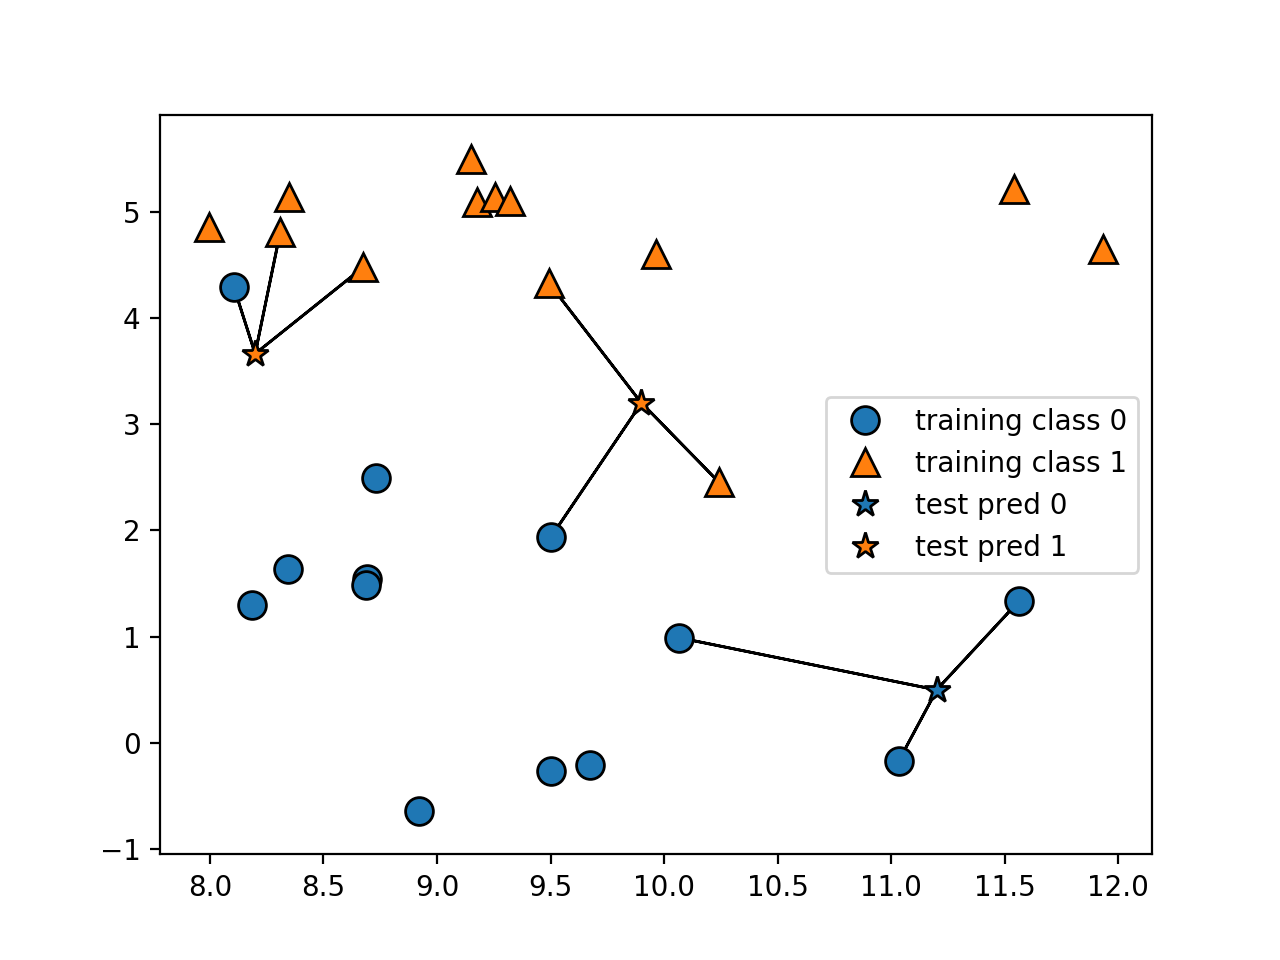

In [28]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Броят съседи определя колко "гладка" е границата между двата класа. Ето един пример с различен брой съседи:

<IPython.core.display.Javascript object>


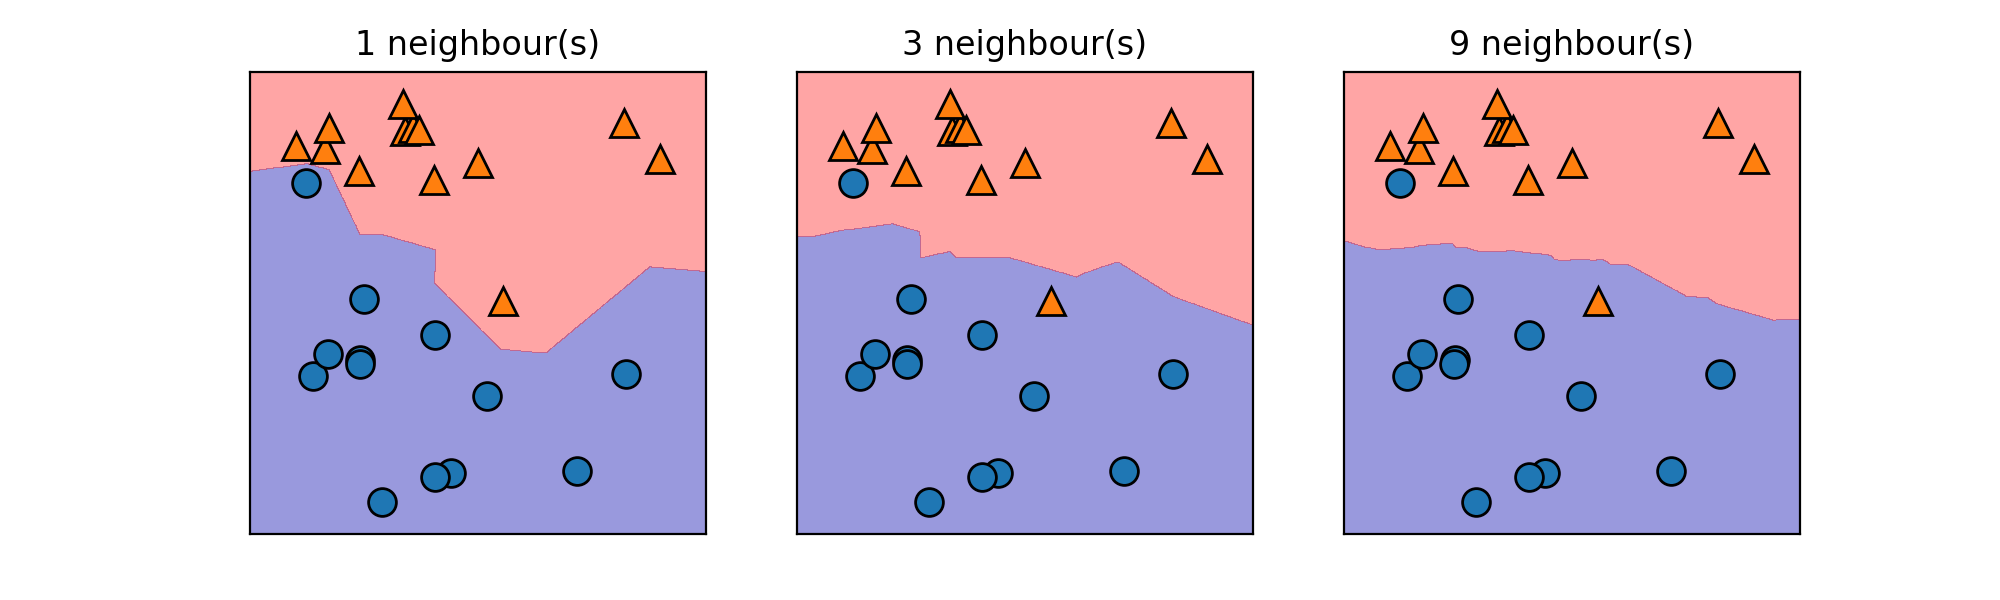

In [32]:
from sklearn.neighbors import KNeighborsClassifier

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbour(s)".format(n_neighbors))

Фонът в горната диаграма определя в кой от двата класа ще попадне дадена точка. Обърнете внимание, че при k=1 границата е начупена и хваща всеки елемент. При по-голямо k границата става по-плавна, макар и да класифицира някои елементи грешно. Това може да е предимство (ще игнорира аномалии в данните). Ще видим вариации на тази тема по-натам с нормализация в линейните модели.

# Linear Regression
### Supervised, регресия

Най-популярния модел. Опитва се да намери линейна функция, който приближава данните. С обработка на feature-ите може да намира и нелинейни функци, но това следващия път.

w[0]: 0.393906  b: -0.031804


<IPython.core.display.Javascript object>


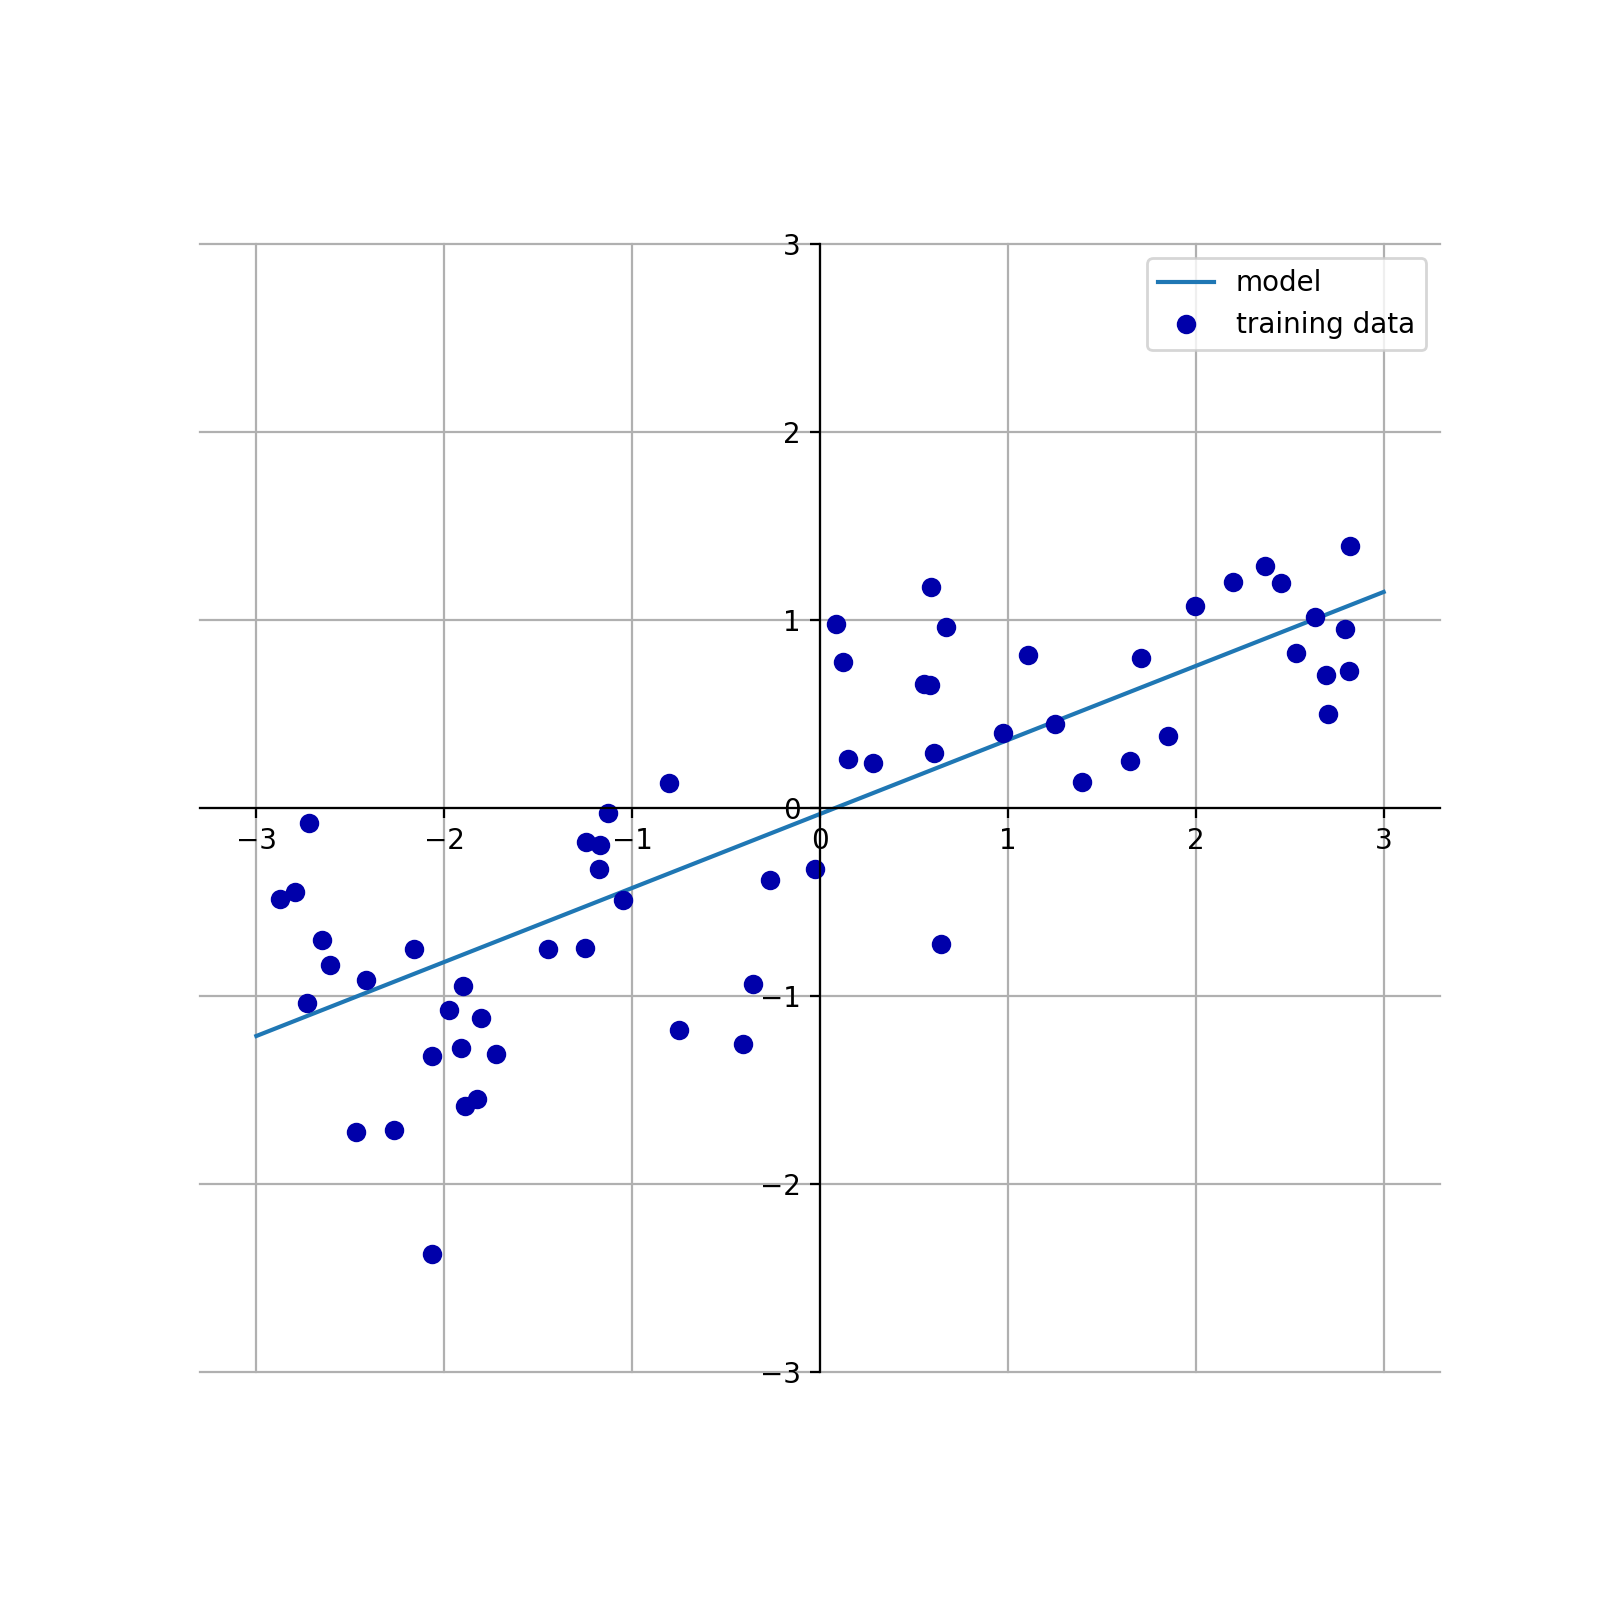

In [35]:
mglearn.plots.plot_linear_regression_wave()

Алгоритъмът се опитва да намери линейна функция, която минимизира общата грешката (сумата от квадратите на дистанцията между резултата от линейната функция и y координата на всеки елемент от набора от данни). В горния е трудно да се направи по-точен линеен модел, тъй като данните имат голяма вариация за едни и същи входни стойности. При наличието на повече измерения обикновено може да се постигне по-добър резултат.

# Principal Component Analysis
### Unsupervised, dimensionality reduction

Можете да сведете многомерно пространство до такова с по-малко измерения, които запазват (почти напълно) същата информация.

Може да се ползва за feature selection – да намалите броя характеристики с които тренирате модел, свеждайки ги до по-малко.

<IPython.core.display.Javascript object>


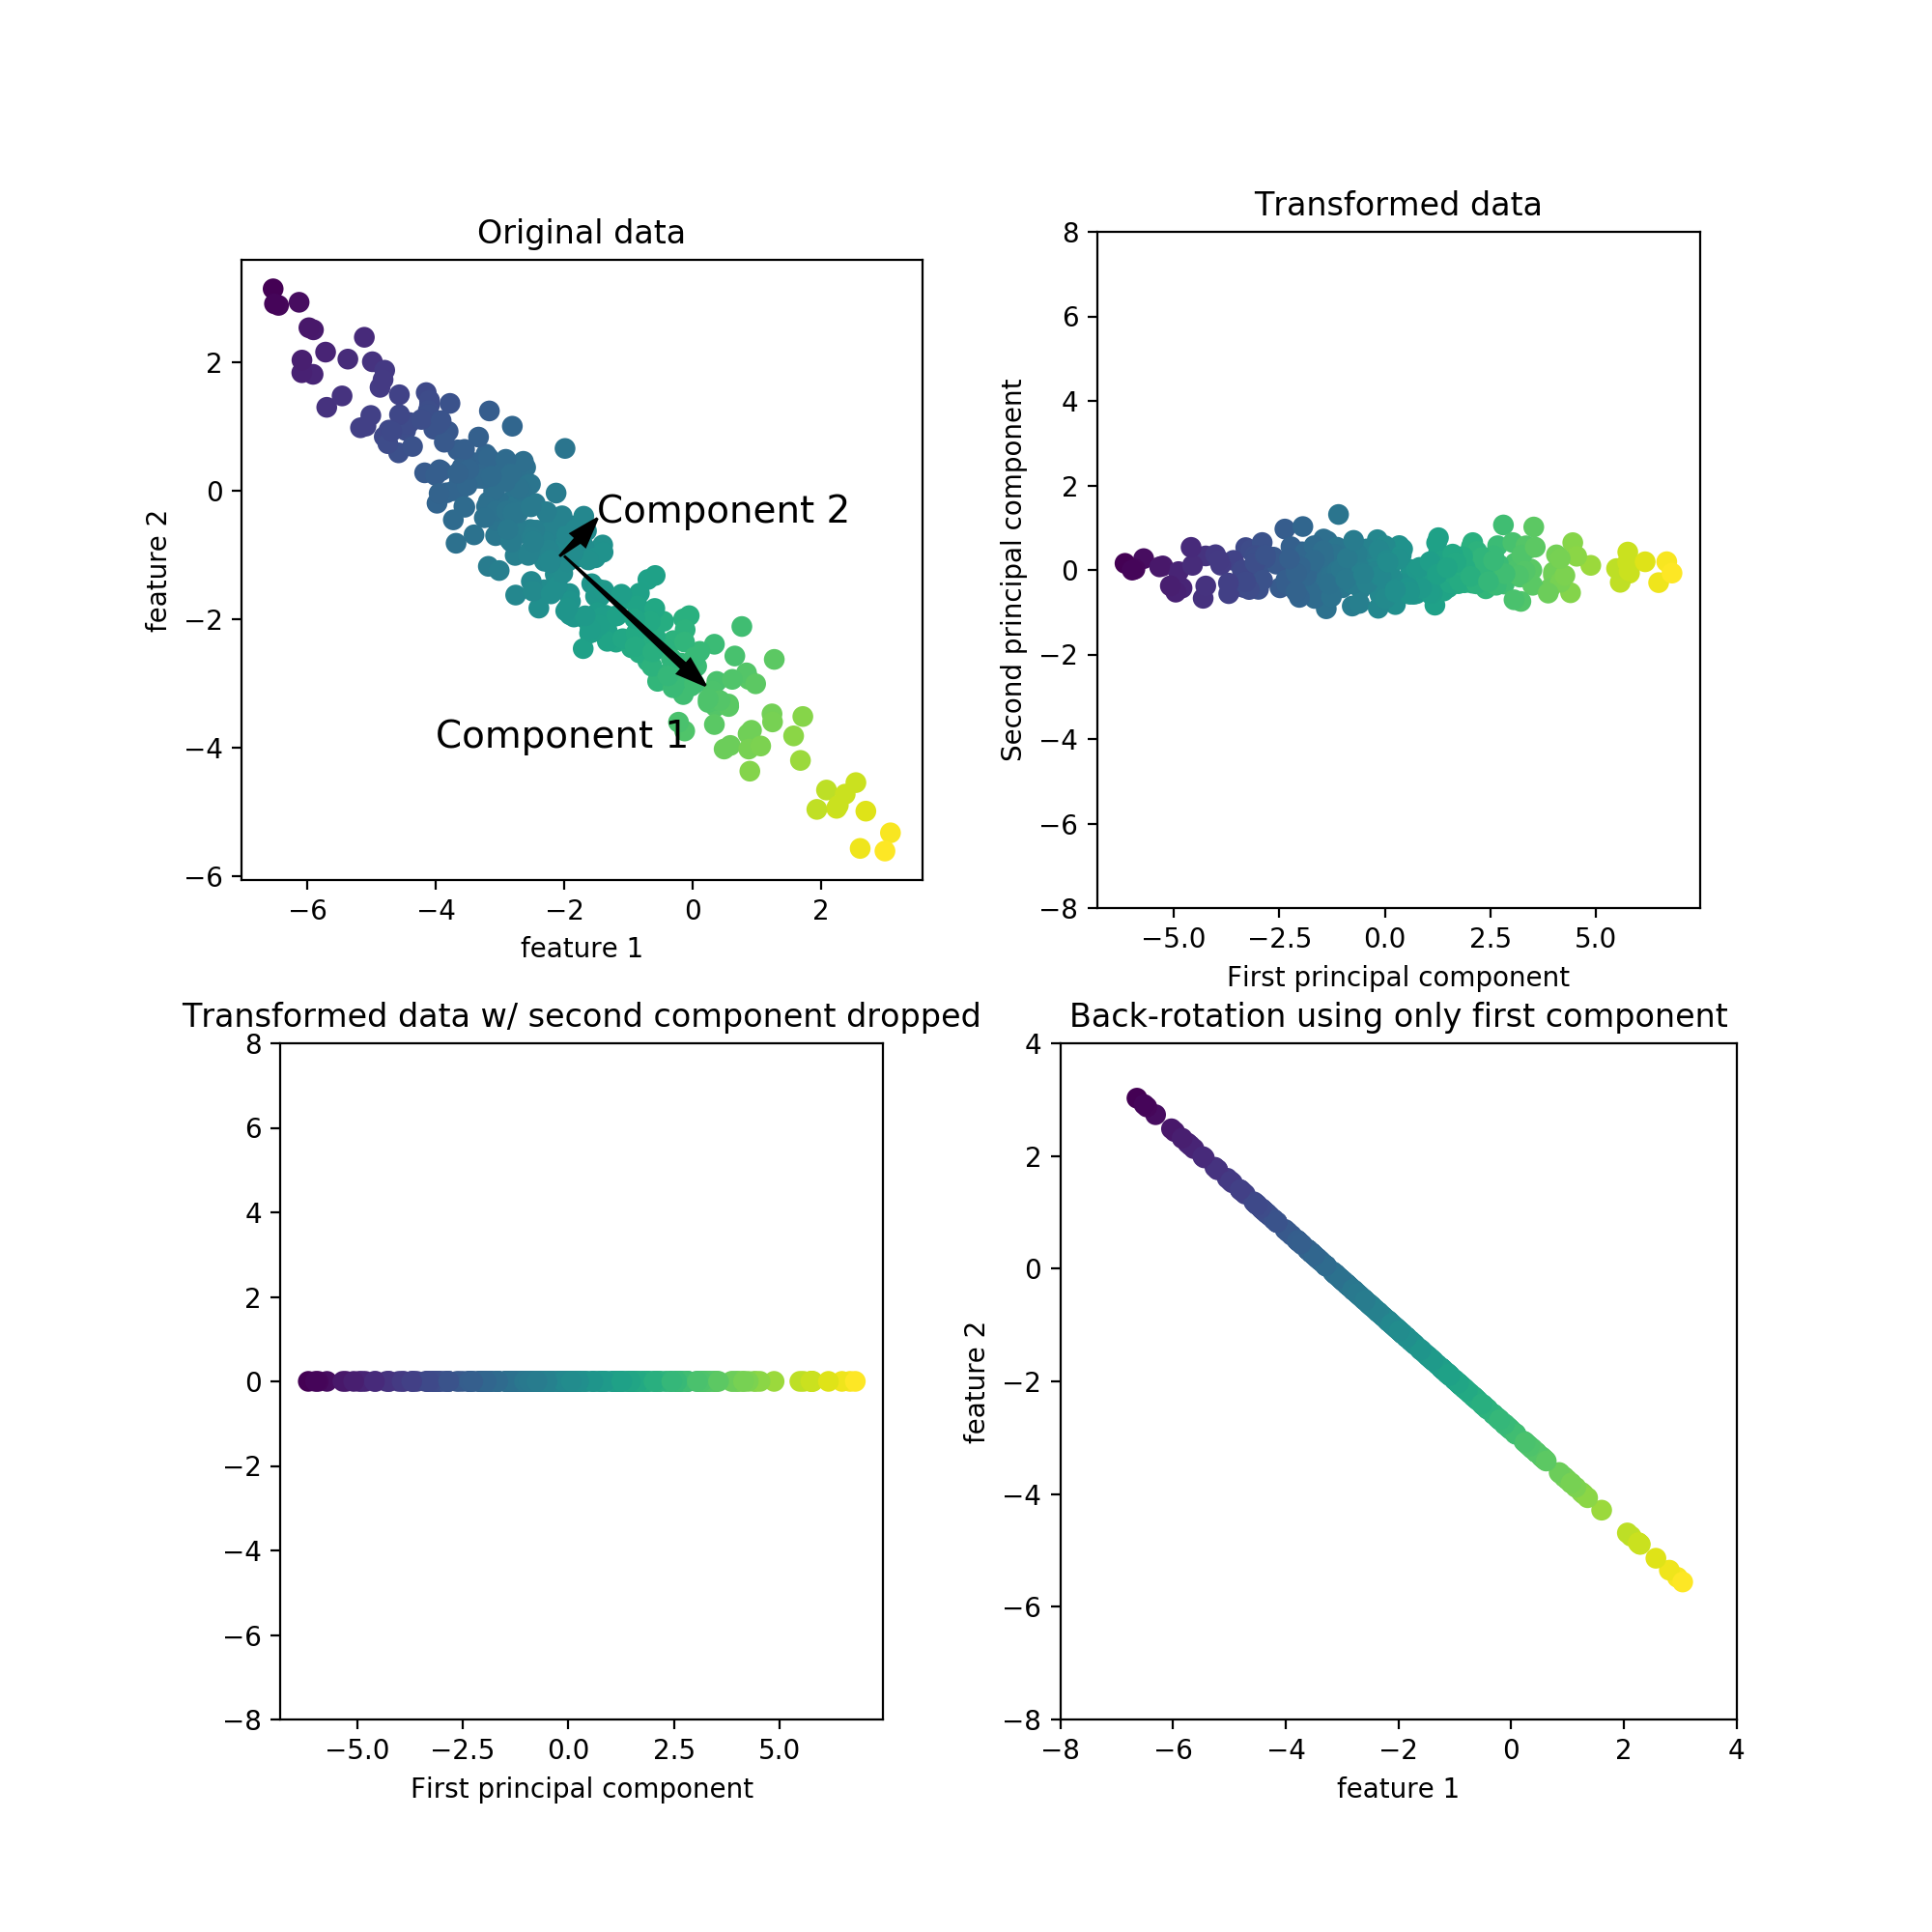

In [36]:
mglearn.plots.plot_pca_illustration()

Графиките горе илюстрират как PCA се опитва да сведе двуизмерно пространство до едноизмерно. Данните могат да се представят чрез базис от два вектора (component 1 и component 2), където component 1 съдържа много информация, а component 2 – малко. С този dataset бихме могли да тренираме относително точен модел само с component 1. Обърнете внимание, че той е функция на оригиналните два feature-а.

При две измерения това не е нужно, но при 1000+ подобна трансформация на данните може да е задължителна за да има шанс да съберете модела в паметта.

# k-Means Clustering
### Unsupervised, клъстеризация

Опитва се да раздели данните на определен брой клъстери.

<IPython.core.display.Javascript object>


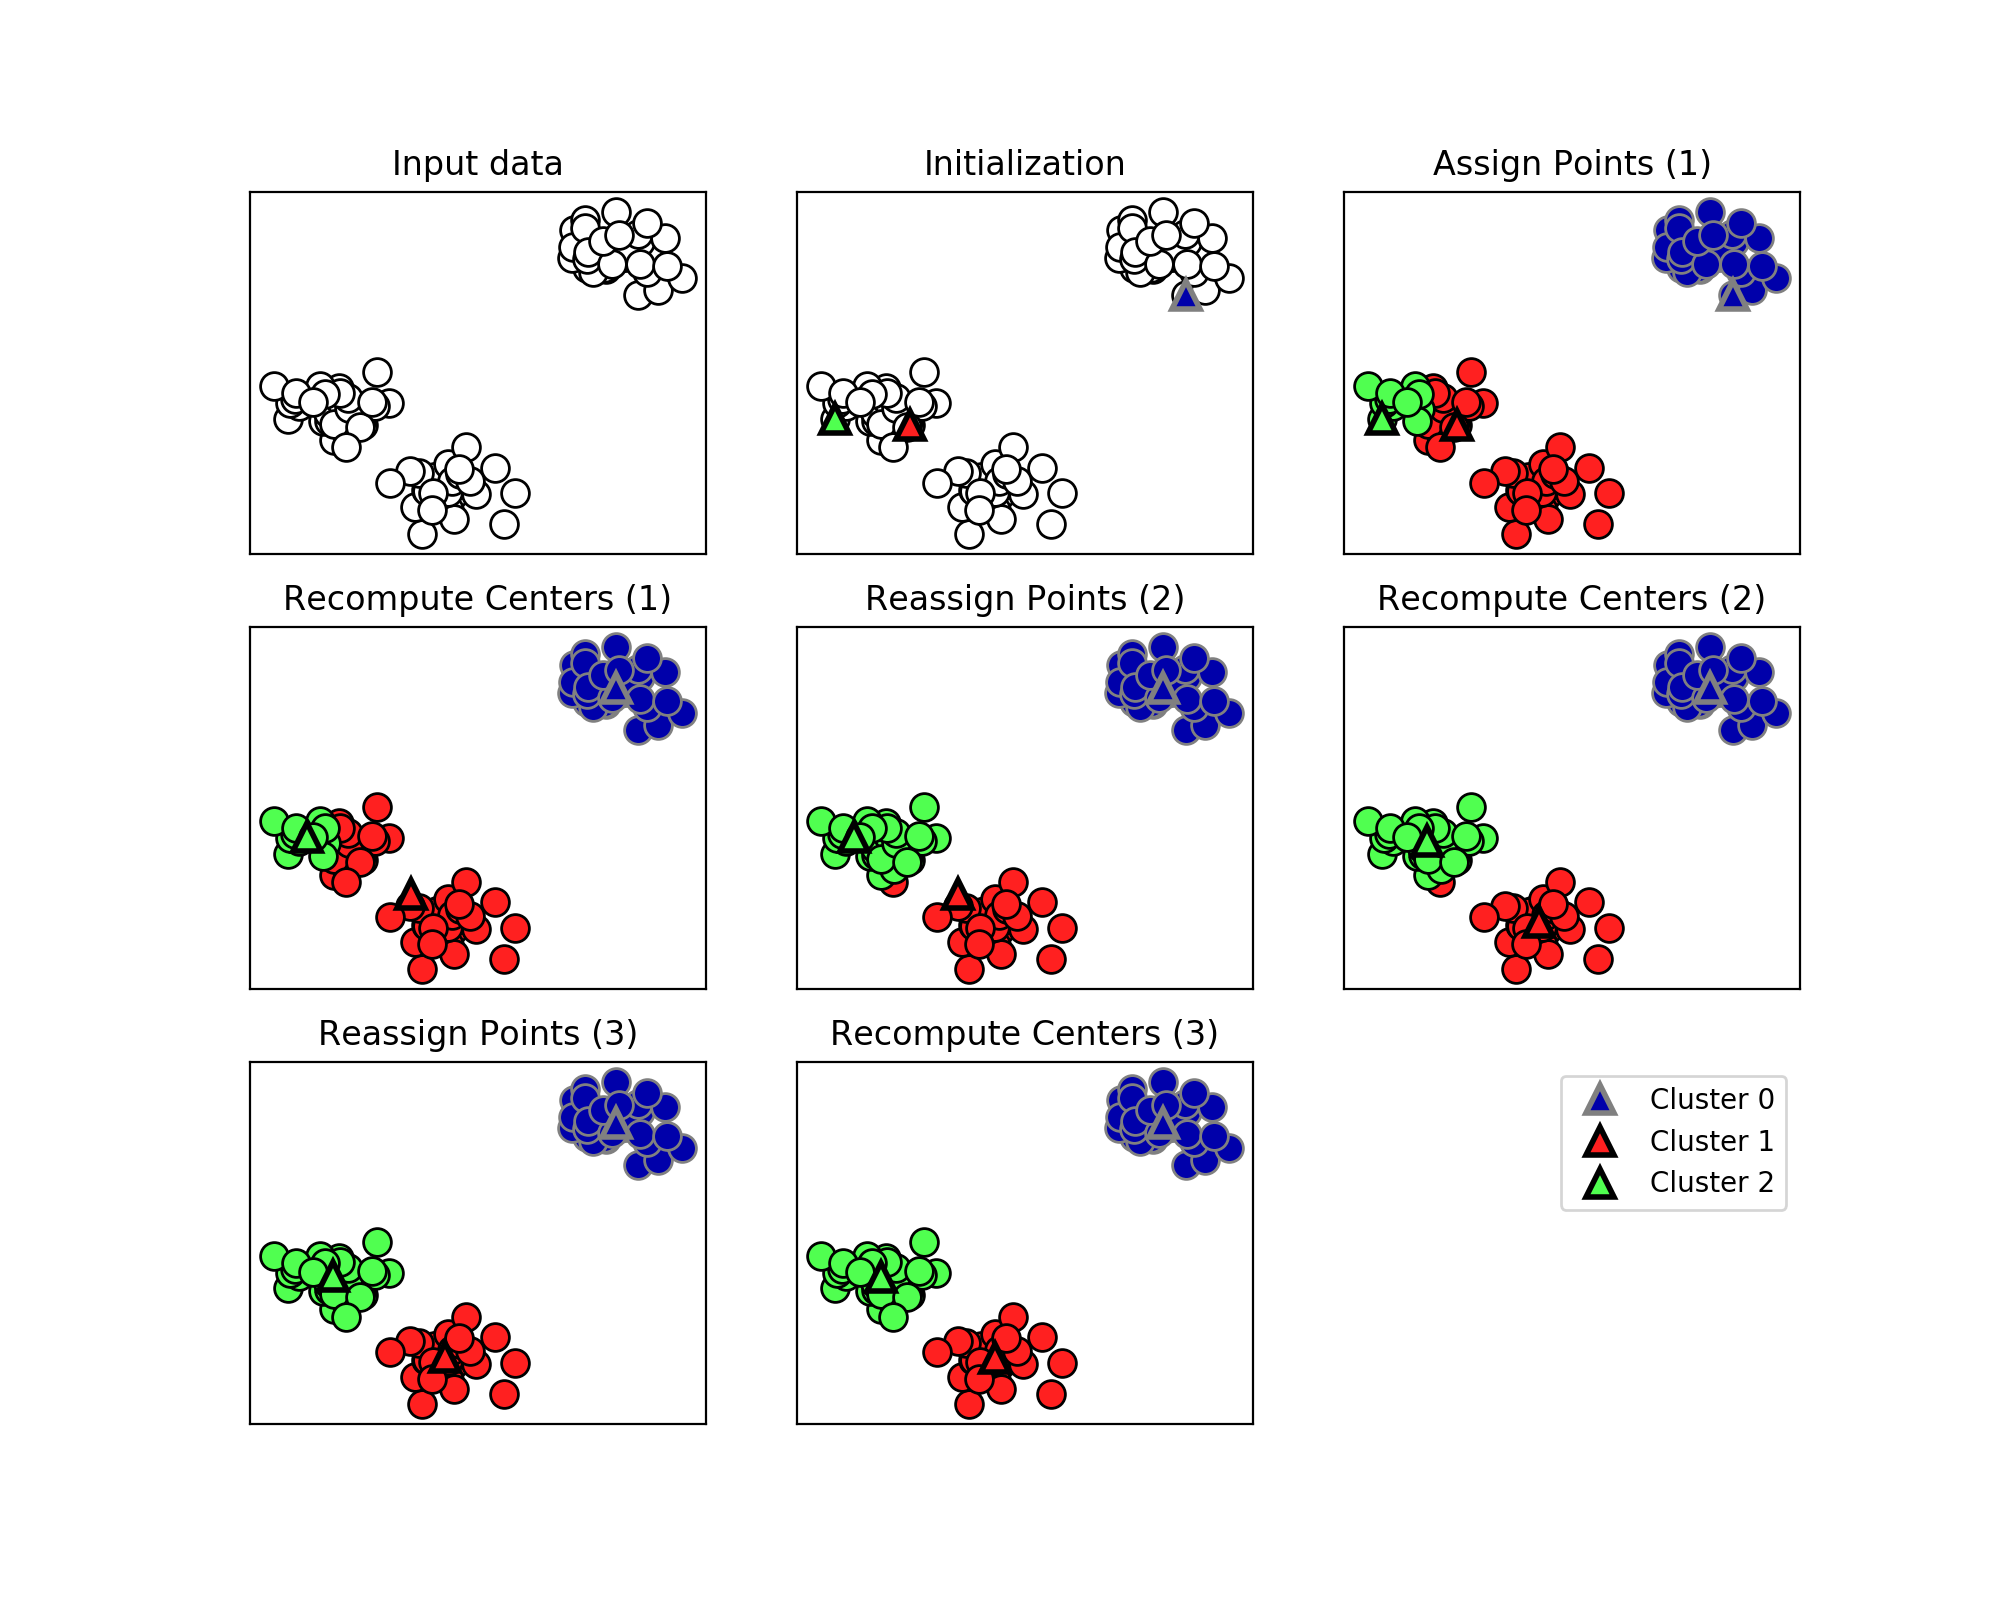

In [37]:
 mglearn.plots.plot_kmeans_algorithm()

Този алгоритъм е относително магически. Работи по следния начин:

1. Избира три произволни точки.
2. За всяка точка оцветява данните, за които тя е най-близка.
3. Преизчислява центъра на всеки клъстър от точки от един цвят и мести точката там.
4. Връща се на стъпка 2 и повтаря докато се стабилизира.

Този алгоритъм е недетерминистичен – различен избор на първоначални точки може да произведе различни резултати. По тази причина на практика се изпълнява няколко пъти и се взема добър резултат.

Това също е мотив, който се среща често.

# Обобщение

* Матрица от данни $X$ и резултат $y$
* Supervised vs. unsupervised learning
* Регресия и класификация

# Ресурси

* [Introduction to Machine Learning](http://shop.oreilly.com/product/0636920030515.do)
* [Machine Learning course by Andrew Ng](https://www.coursera.org/learn/machine-learning)

# Въпроси

* http://fmi.machine-learning.bg
* fmi@machine-learning.bg